# Simple FLS Images Manipulation

In [1]:
import cv2
import numpy as np
import math

import matplotlib.pyplot as plt

In [2]:
def cartesian_to_polar_sonar(cart_image, range_max=10, h_fov=130):

    pix_per_meters = 50
    h, w = cart_image.shape[:2]

    center_x = w // 2
    center_y = h - 1 
    

    dr = range_max / h
    dth = (h_fov / 180 * math.pi) / w
    

    polar_height = math.floor(range_max*pix_per_meters) 
    polar_width = polar_height

    polar_width = w
    polar_height = h

    polar_image = np.zeros((polar_height, polar_width))

    for y in range(polar_height):
        r = (polar_height - y)/pix_per_meters
        for x in range(polar_width):
            th = - (h_fov / 180 * math.pi)/2 + dth*x*w/polar_width
            xx = center_x + math.floor(r * math.sin(th) * pix_per_meters) #* w/polar_width)
            yy = center_y - math.floor(r * math.cos(th) * pix_per_meters) #* h/polar_height)
            
            polar_image[y,x] = cart_image[yy,xx]
    
    
    return polar_image


In [ ]:
def cartesian_to_polar_sonar_bilinear(cart_image, range_max=10, h_fov=130):

    pix_per_meters = 50
    h, w = cart_image.shape[:2]

    center_x = w // 2
    center_y = h - 1 
    

    dr = range_max / h
    dth = (h_fov / 180 * math.pi) / w
    

    polar_height = math.floor(range_max*pix_per_meters) 
    polar_width = polar_height

    polar_width = w
    polar_height = h

    polar_image = np.zeros((polar_height, polar_width))

    for y in range(polar_height):
        r = (polar_height - y)/pix_per_meters
        for x in range(polar_width):
            th = - (h_fov / 180 * math.pi)/2 + dth*x*w/polar_width
            xx = center_x + math.floor(r * math.sin(th) * pix_per_meters) #* w/polar_width)
            yy = center_y - math.floor(r * math.cos(th) * pix_per_meters) #* h/polar_height)
            
            polar_image[y,x] = cart_image[yy,xx]
    
    
    return polar_image

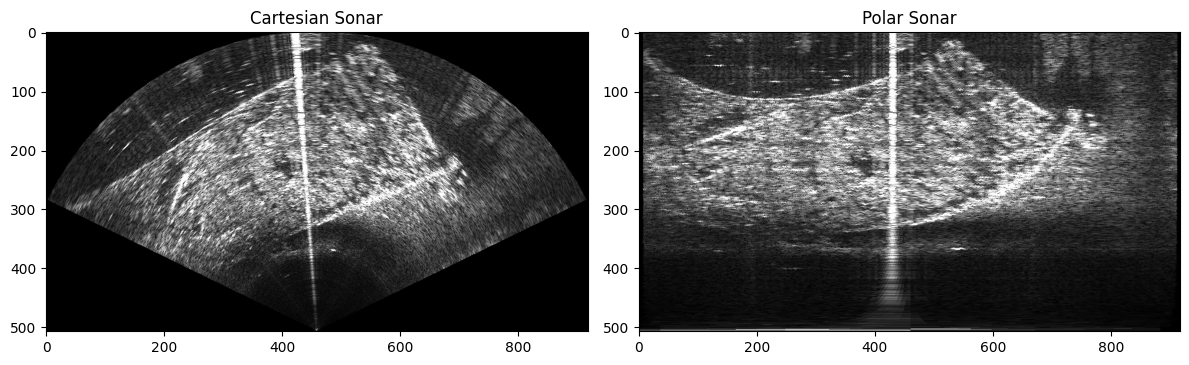

Original shape: (507, 918)
Polar shape: (507, 918)
Max range: 10 meters


In [9]:
i = 2
j = 2
sonar_img_path = f'./images/sonar/image{i}_{j}'

sonar_img = cv2.imread(sonar_img_path + '_cart.jpg', cv2.IMREAD_GRAYSCALE)

if sonar_img is not None:

    h, w = sonar_img.shape[:2]
    sonar_img = sonar_img[:, 53:(w-53)]
    cv2.imwrite(sonar_img_path + '_cart.jpg', sonar_img)

    polar_sonar = cartesian_to_polar_sonar(sonar_img, range_max=10)
    
    # Display results
    plt.figure(figsize=(12, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(sonar_img, cmap='grey')
    plt.title('Cartesian Sonar')

    plt.subplot(1, 2, 2)
    plt.imshow(polar_sonar, cmap='grey')
    plt.title('Polar Sonar')

    plt.tight_layout()
    plt.show()

    # Save the result        
    cv2.imwrite(sonar_img_path + '_polar.jpg', polar_sonar)
    
    print(f"Original shape: {sonar_img.shape}")
    print(f"Polar shape: {polar_sonar.shape}")
    print(f"Max range: 10 meters")
    
